# Исследование закономерностей, определяющих успешность видеоигр

***Описание проекта:***

***В этом исследовании мы будем работать с данными о продажах видеоигр с 1980 по 2016 годы для разных платформ (консоли, ПК, портативные игровые системы) и в разных регионах. Наша задача: выявить, что влияет на успех игры из имеющихся параметров. Результаты проекта нужны руководству, чтобы принять решение в какой продукт лучше вкладываться и как выстраивать рекламные кампании.***

***Для начала мы рассмотрим весь массив данных и с помощью информации о средней продолжительности "жизни" платформы выделим наиболее важные данные. Затем рассмотрим популярность платформ, влияние оценок пользователей и критиков на продажи игр и популярность различных игровых жанров. Данные о продажах игр разделены также на регионы, нужно исследовать информацию и с этой точки зрения. Что пользуется спросом в каждом регионе? Что влияет на продажи, а что нет?***

***В завершении исследования нужно проверить гипотезы о равенстве средних пользовательских рейтингов платформ Xbox One и PC, жанров Action и Sports.***

## Знакомство с данными

In [1]:
# добавляем библиотеки, которые будем использовать

import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
from IPython.display import display

In [2]:
# сохраняем датафрейм в переменную и выводим основную информацию о нем

games_data = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vRTAE7BY9Fy-mZT0cCBZitK5DM2ZTK6151VaWYs4FEbewBMiQDAQLXNgqMNIiTpWfaoc3FaDoQneL3Z/pub?output=csv')
games_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [3]:
games_data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


**Вывод:**

Мы увидели в фрейме 16 715 строк. Есть пропуски в 6 столбцах. В двух нужно исправить тип данных. Этим мы будем заниматься в следующем разделе проекта. Также мы увидели самю таблицу, и теперь понимаем, что в названиях столбцов нужно понизить регистр. Небольшие недочеты выявлены, переходим к предобработке данных.

## Предобработка данных

In [4]:
# понижаем регистр имен всех столбцов
games_data.columns = games_data.columns.str.lower()
# изменяем регистр столбца genre
games_data['genre'] = games_data['genre'].str.lower()
games_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [5]:
# в столбце user_score много пропусков и неверный тип данных, стоит посмотреть на его значения

games_data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Кроме чисел и NaN встречается значение "tbd". Эта аббревиатура расшифровывается как "to be determined" и означает, что информация еще не определена. Значит такие значения нужно заменить на NaN с помощью аргумента errors и его значения 'coerce'.

In [6]:
# в столбеце user_score нужно изменить тип данных с object на float

games_data['user_score'] = pd.to_numeric(games_data['user_score'], errors='coerce')
print(games_data.dtypes['user_score']) # проверка результата
games_data['user_score'].isna().sum() #считаем пропуски

float64


9125

Несмотря на количество пропущенных значений, мы не будем ничего с ними делать. Заменить их никак нельзя не исказив данные, а это в свою очередь повлияет на наши выводы. Из-за большого количества удалить пропуски также невозможно без вреда для данных. 

In [7]:
# считаем пропуски в столбце critic_score
games_data['critic_score'].isna().sum()

8578

In [8]:
list_null = ['name', 'year_of_release', 'genre']
for col in list_null:
    print(games_data.index[games_data[col].isna()].tolist())

# удаляем пропущенные значения из 3 столбцов
games_data = games_data.dropna(subset=['name', 'year_of_release', 'genre']).reset_index(drop=True)

games_data['year_of_release'] = games_data[
    'year_of_release'].astype('int') # меняем тип данных в столбце year_of_release

# проверяем результат
print(games_data['name'].isna().sum(),
games_data['year_of_release'].isna().sum(),
games_data['genre'].isna().sum())

[659, 14244]
[183, 377, 456, 475, 609, 627, 657, 678, 719, 805, 1131, 1142, 1301, 1506, 1538, 1585, 1609, 1650, 1699, 1840, 1984, 2010, 2106, 2108, 2132, 2157, 2169, 2273, 2281, 2361, 2453, 2479, 2492, 2522, 2536, 2572, 2773, 2849, 2969, 3024, 3081, 3187, 3223, 3233, 3289, 3352, 3413, 3459, 3486, 3704, 3739, 3883, 3997, 4127, 4132, 4205, 4220, 4294, 4337, 4373, 4437, 4445, 4635, 4648, 4775, 4818, 4848, 4945, 4959, 5041, 5070, 5156, 5194, 5294, 5326, 5336, 5443, 5492, 5588, 5624, 5642, 5655, 5769, 5800, 5857, 5874, 5889, 5932, 6019, 6101, 6133, 6180, 6199, 6255, 6266, 6293, 6299, 6342, 6356, 6476, 6624, 6636, 6773, 6818, 6861, 6899, 6954, 6999, 7008, 7108, 7210, 7332, 7353, 7354, 7367, 7387, 7391, 7406, 7584, 7605, 7724, 7735, 7848, 8023, 8067, 8150, 8151, 8197, 8212, 8250, 8260, 8319, 8364, 8500, 8547, 8632, 8680, 8740, 8884, 8918, 9043, 9119, 9151, 9218, 9293, 9380, 9485, 9516, 9664, 9703, 9706, 9738, 9761, 9817, 9827, 9830, 9855, 9876, 10050, 10258, 10317, 10465, 10486, 10612, 10686,

Мы знали, что в столбцах `name`, `genre` и `year_of_release` есть пропуски и решили вывести их индексы, чтобы проверить совпадут ли последние. Индексы для столбцов `name` и `genre` совпали. 

In [9]:
# изучаем значения в столбце rating
display(games_data['rating'].unique())
display(games_data['rating'].value_counts())

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

rating
E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
AO         1
RP         1
Name: count, dtype: int64

Значения аббревиатур ESRB неизвестны. После уточнения информации выяснилось, что 'K-A' в 1998 года заменили на 'E', а точнее просто включили в него. Поэтому нам требуется изменить это значение в столбце rating.

In [10]:
# для того, чтобы понимать смысл аббревиатур ESRB, нам понадобилось посмотреть эту информацию в интернете.
# выяснилось, что 'K-A' в 1998 года заменили на 'E', поэтому нам требуется изменить его значение в столбце

games_data['rating'] = games_data['rating'].str.replace('K-A', 'E')

In [11]:
games_data['rating'] = games_data['rating'].fillna('no_rating')

In [12]:
#
print(games_data.duplicated().sum())
print(games_data[games_data.duplicated(['name', 'platform', 'year_of_release'])])

0
                name platform  year_of_release   genre  na_sales  eu_sales  \
15969  Madden NFL 13      PS3             2012  sports       0.0      0.01   

       jp_sales  other_sales  critic_score  user_score rating  
15969       0.0          0.0          83.0         5.5      E  


In [13]:
games_data = games_data.drop(index=15969)

In [14]:
# добавляем столбец со всеми продажами

games_data['all_sales'] = games_data.loc[:,['na_sales','eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
display(games_data.head())
games_data.dtypes['all_sales'] # на всякий случай проверяем тип данных

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,no_rating,40.24
2,Mario Kart Wii,Wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,no_rating,31.38


dtype('float64')

**Вывод**

Чтобы подготовить данные к анализу мы понизили регистр в названиях столбцов, а также в значениях столбца `genre`. Удалили пропуски в столбцах `name`, `genre`, `year_of_release`. Причины пропусков могут быть разными, возможно, произошел сбой и название и жанр двух игр не попали в датафрейм из-за него. Возможно, они не были указаны в ресурсе, откуда собирали данные. Причины пропущенных значений в 
В столбцах `year_of_release` и `user_score` изменили тип данных. Заменили неправильные значения в `year_of_release` могут быть те же. 
В столбце `rating` заменили устаревшее значение и создали столбец `all_sales` с суммарными продажами.

In [15]:
# Комментарий ревьюера
# Посмотрим, что осталось
temp = games_data.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().mean()*100,2),'%') 

<class 'pandas.core.frame.DataFrame'>
Index: 16443 entries, 0 to 16443
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int32  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       7462 non-null   float64
 10  rating           16443 non-null  object 
 11  all_sales        16443 non-null  float64
dtypes: float64(7), int32(1), object(4)
memory usage: 1.6+ MB
None
-------------------------
name ['.hack//G.U. Vol.1//Rebirth' '.hack//G.U. Vol.2//Reminisce'
 '.hack//G.U. Vol.2//Reminisce (jp sales)' ... 'uDraw Studio'
 'uDraw Studio: Instant Artist'

## Исследовательский анализ данных

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     652
2013     544
2014     581
2015     606
2016     502
Name: name, dtype: int64

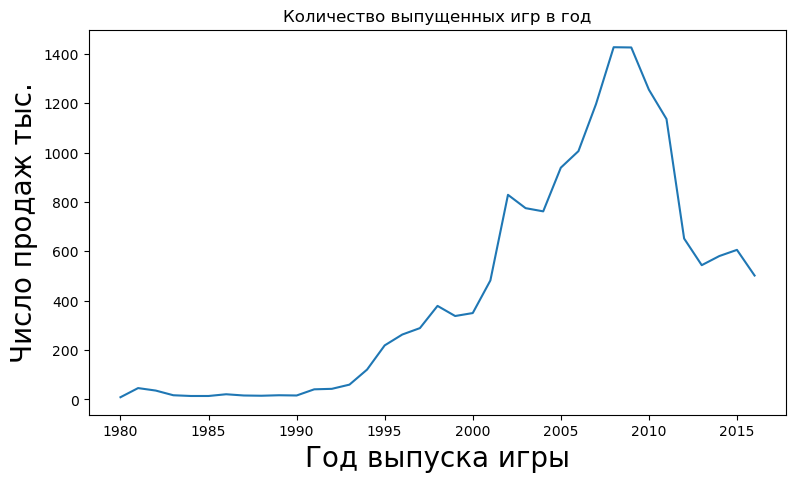

In [16]:
display(games_data.groupby('year_of_release')['name'].count())
games_data.groupby('year_of_release')['name'].count().plot(figsize=(9,5))
plt.title('Количество выпущенных игр в год')
plt.ylabel('Число продаж тыс.', fontsize=20)
plt.xlabel('Год выпуска игры', fontsize=20)
plt.show()

С 1994 года наблюдается рост игровой индустрии, который продолжается до 2009. В 1994 в год выпускало около 100 видеоигр, к 2009 эта цифра выросла до 1400. Но за последние 7 лет количество выпускаемых игр в год умениньшилось почти в 3 раза.

In [17]:
top_platforms = list(games_data.groupby('platform')[
    'all_sales'].sum().sort_values(ascending=False).index[:10])
top_platforms

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA', 'PSP', '3DS']

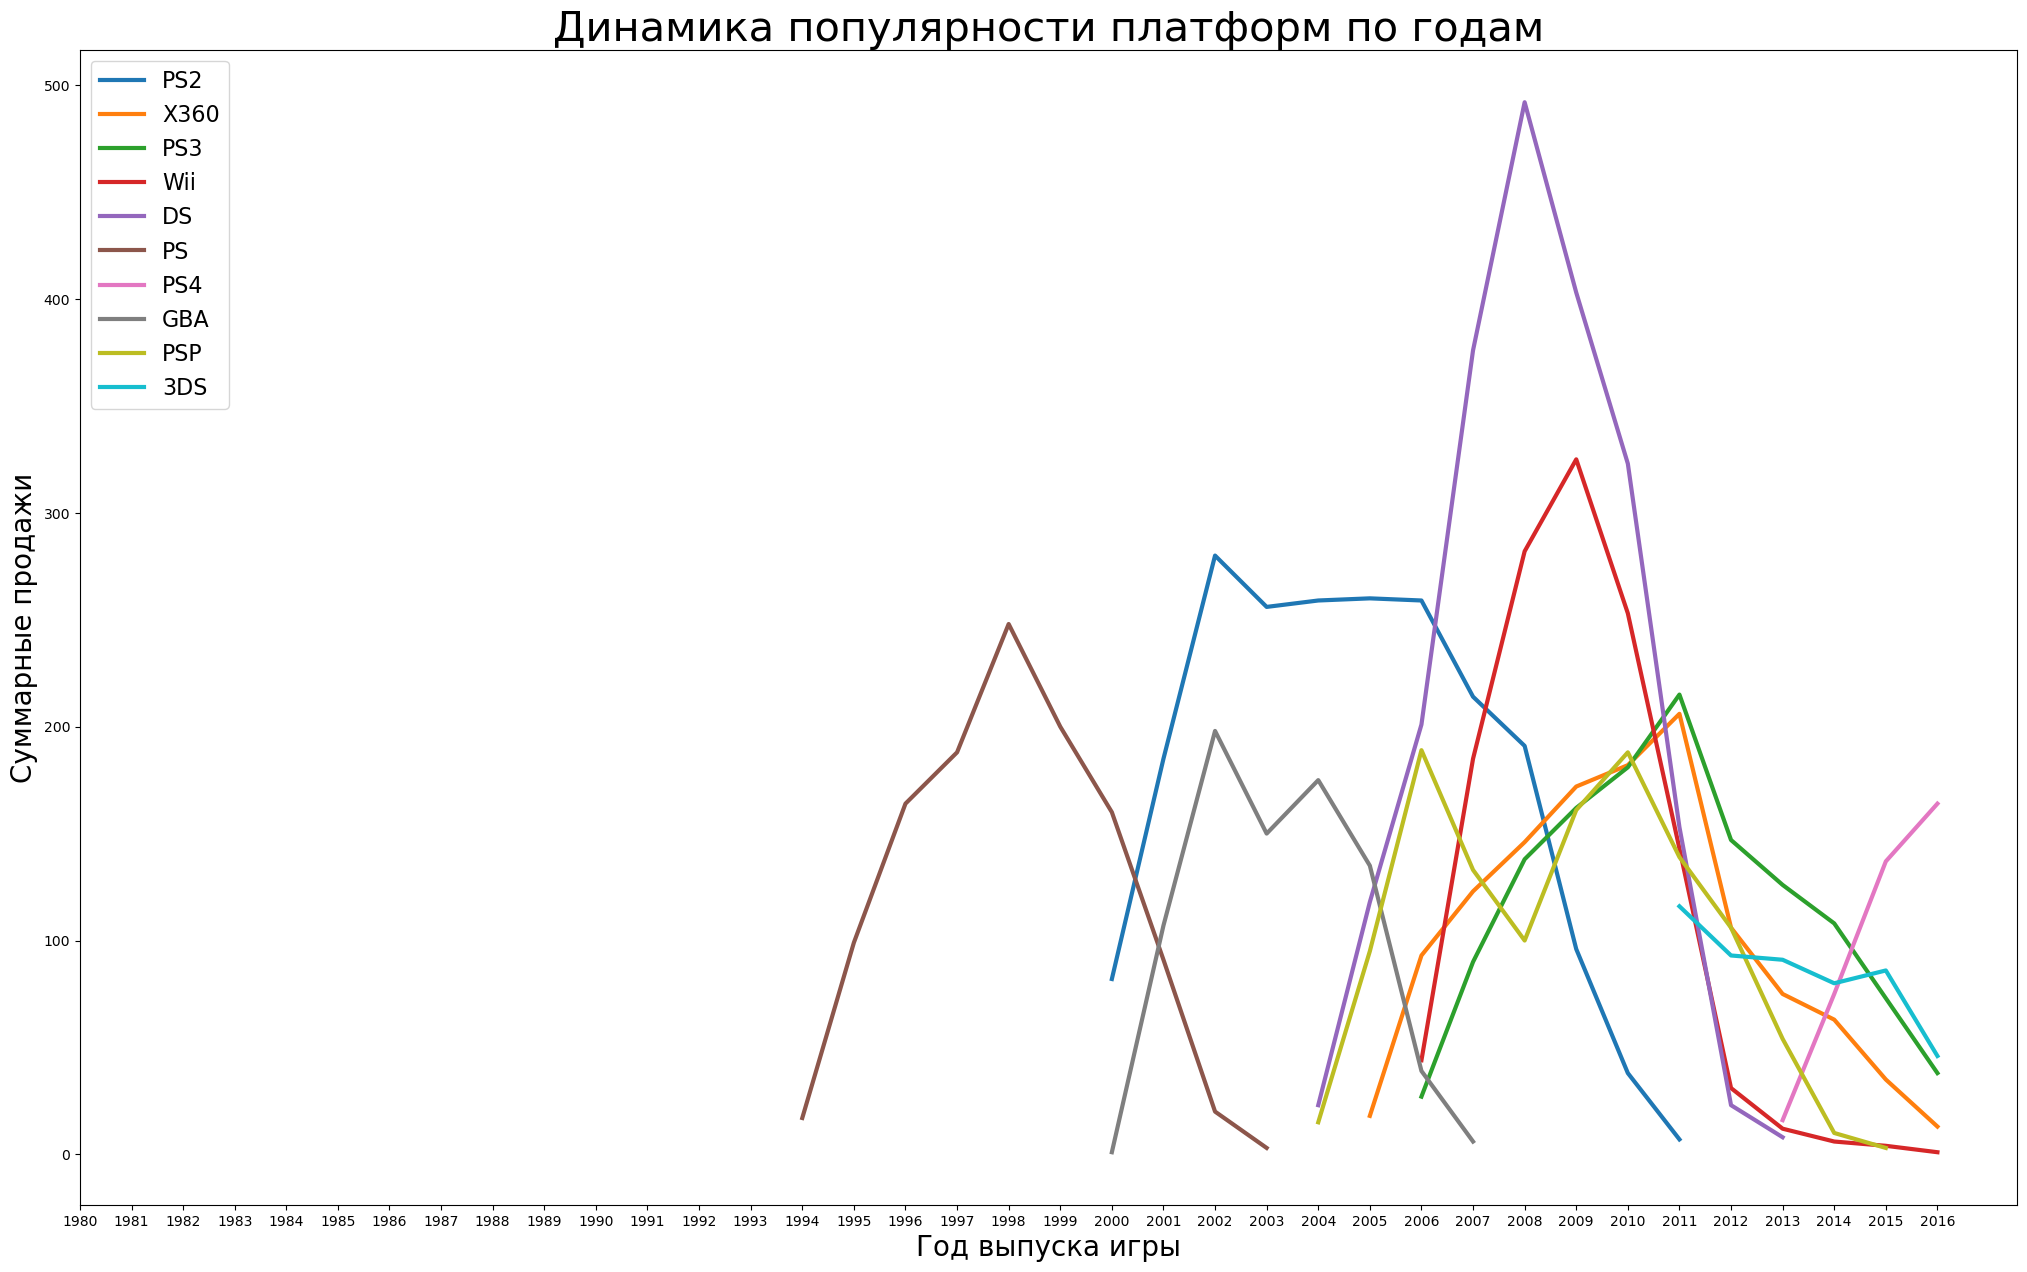

In [18]:
popular_platforms = games_data.pivot_table(index='year_of_release', columns='platform', values='all_sales', aggfunc='count')
popular_platforms[top_platforms].plot(figsize=(25,15), 
                                           linewidth= 3).set_xticks(games_data['year_of_release'].dropna().unique())
plt.title('Динамика популярности платформ по годам', fontsize=30)
plt.ylabel('Суммарные продажи', fontsize=20)
plt.xlabel('Год выпуска игры', fontsize=20)
plt.legend(loc=2, prop={'size': 16})
plt.show()

На графике видно, старые платформы уходят, а новые появляются примерно за 5 лет, поэтому данные с 2012 по 2016 мы и будет считать важными, и использовать в проекте.

In [19]:
games_data = games_data.query('year_of_release > 2011')

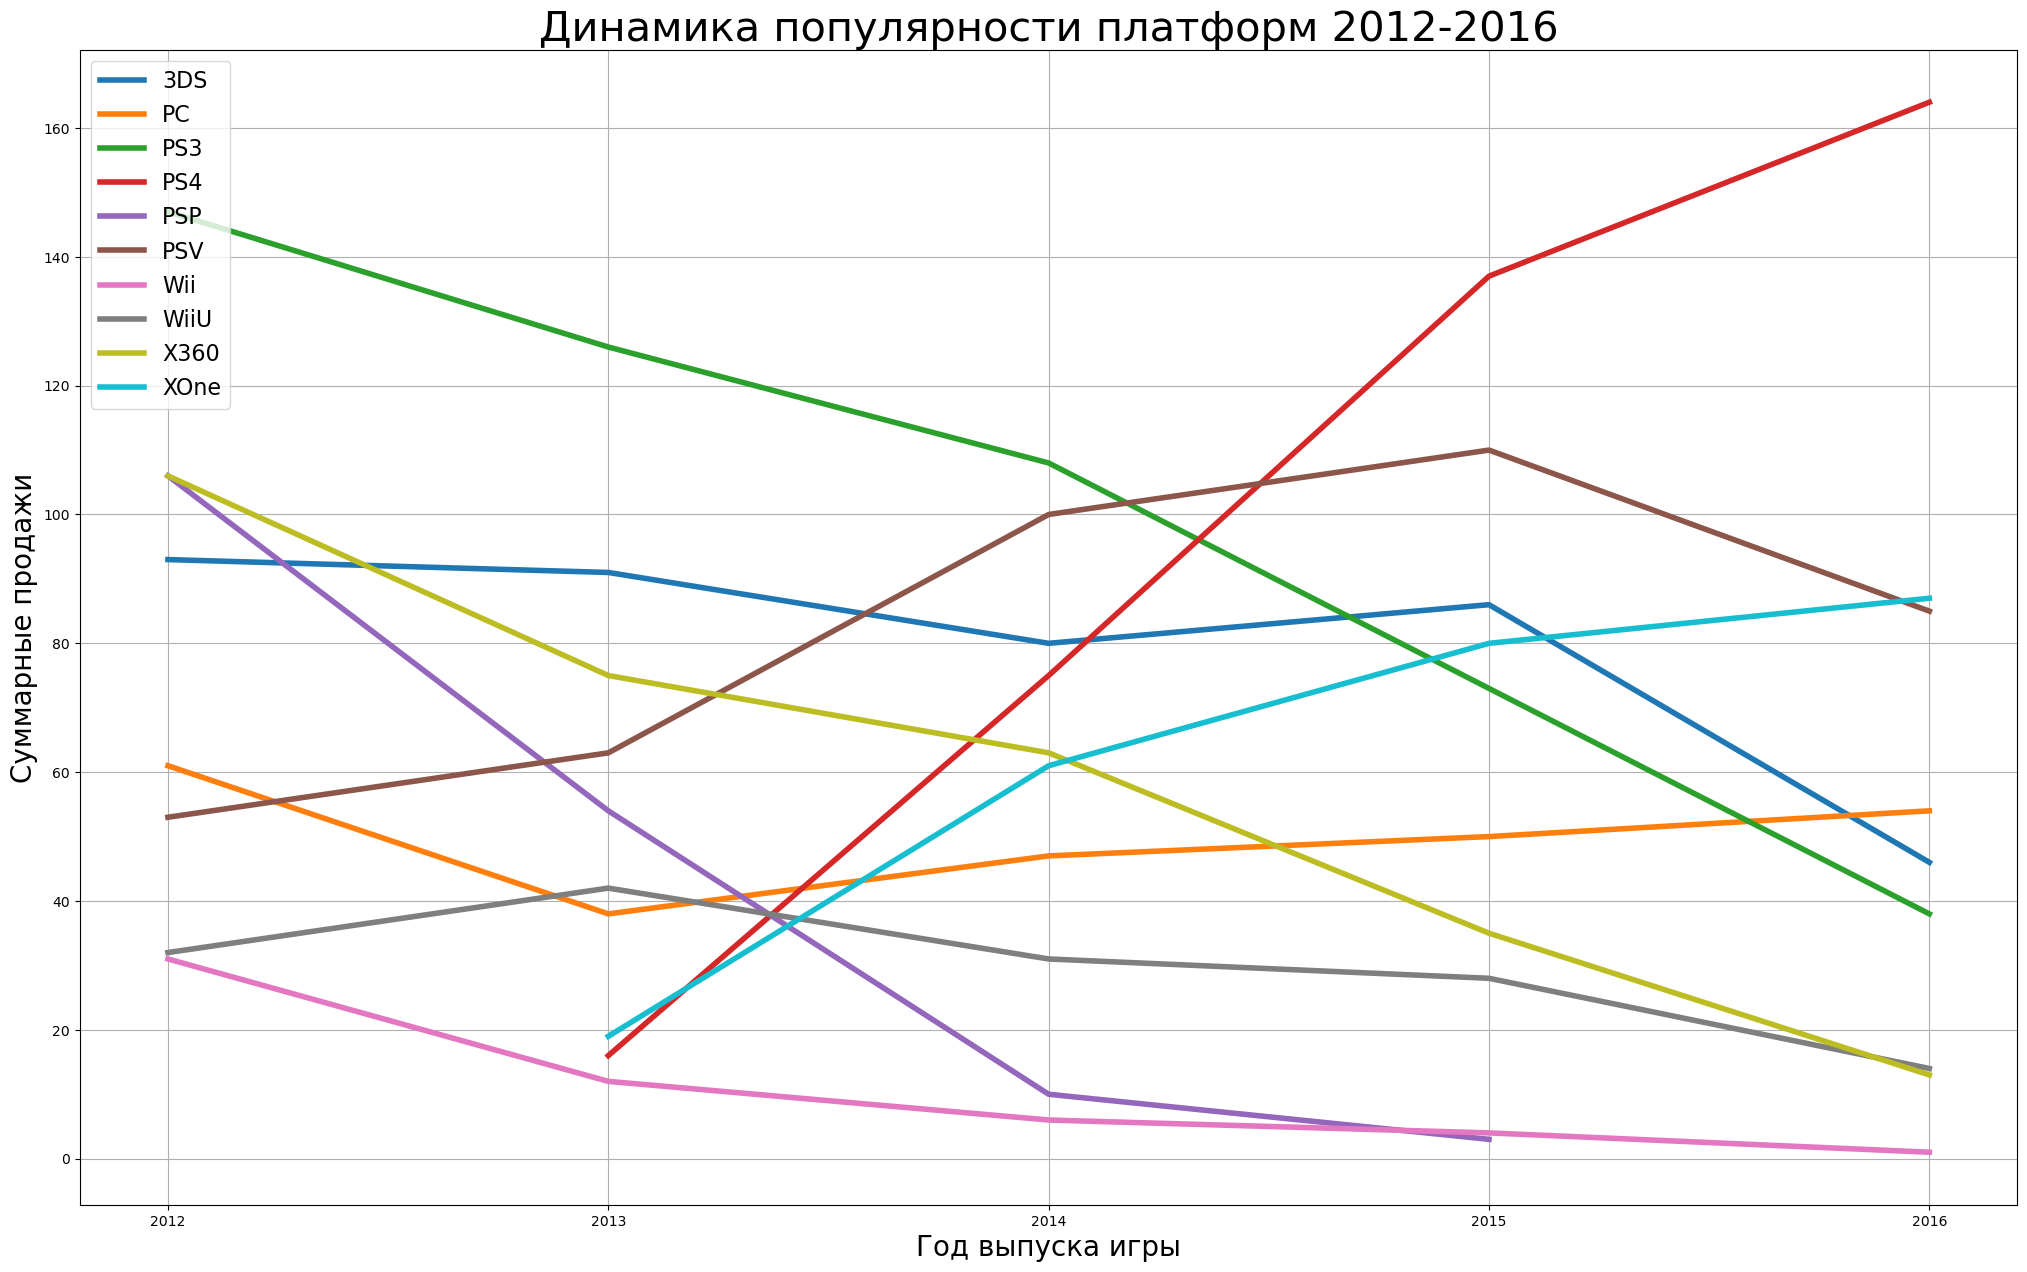

In [20]:
popular_platforms_2 = games_data[games_data['platform'] != 'DS'].pivot_table(index='year_of_release', 
                                             columns='platform', values='all_sales', aggfunc='count')

popular_platforms_2.plot(figsize=(25,15), 
                        linewidth= 4, grid=True).set_xticks(games_data['year_of_release'].dropna().unique())
    
plt.title('Динамика популярности платформ 2012-2016', fontsize=30)
plt.ylabel('Суммарные продажи', fontsize=20)
plt.xlabel('Год выпуска игры', fontsize=20)
plt.legend(loc=2, prop={'size': 16})
plt.show()

На графике мы видим, что активно растут PS4 и Xbox One, также наблюдает не такой быстрый, но все же рост продаж игра на ПК. Динамика продаж игр для остальных платформ падает.

Нужно понять, как сильно отличаются платформы по продажам. Мы видим на предыдущем графике их абсолютные показатели на протяжении времени, но не знаем какой обычно тираж у игр, максимальное и минимальное значения. Для этого нам нужно построить диаграммы размаха для каждой платформы.

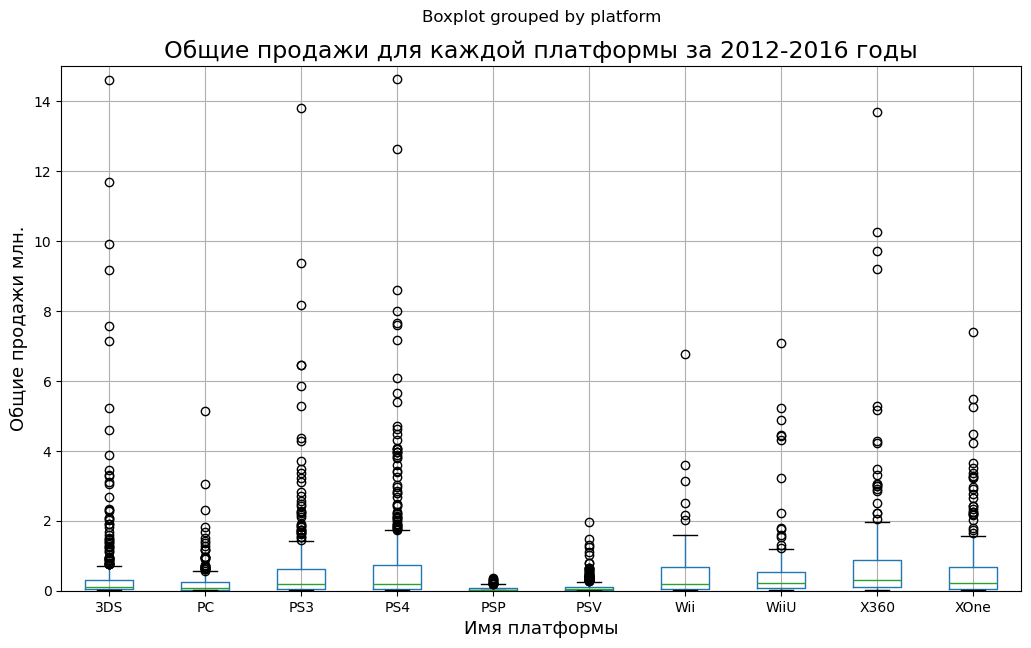

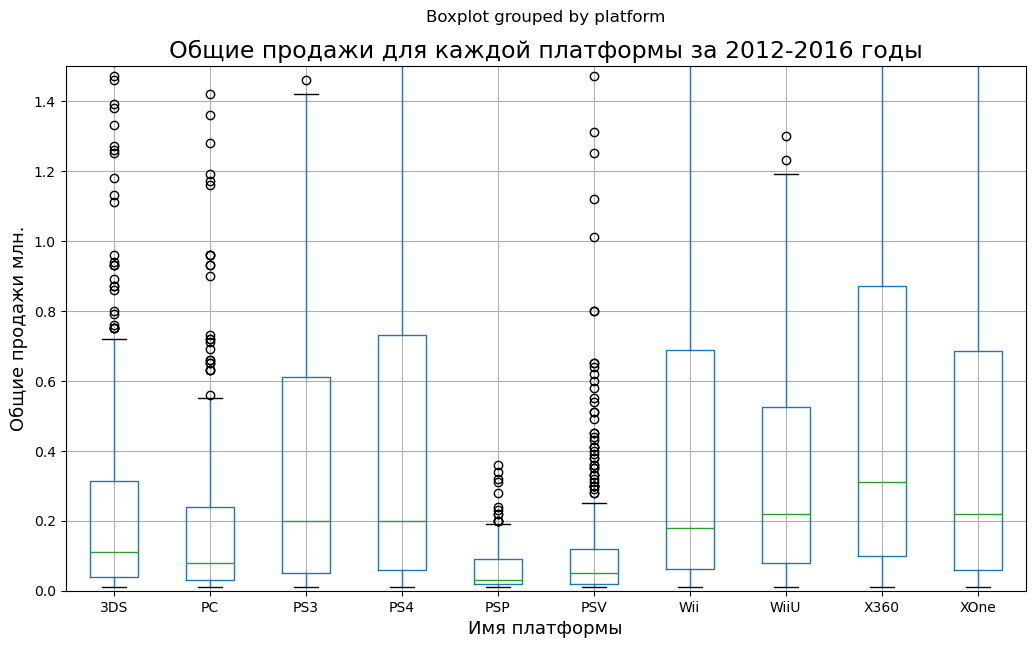

In [21]:
platforms_boxplot = games_data[
    games_data['platform'] != 'DS'].boxplot(
    column='all_sales', by='platform', figsize=(12,7))
plt.ylim([0, 15])
plt.ylabel('Общие продажи млн.', fontsize=13)
plt.xlabel('Имя платформы', fontsize=13)

plt.title('Общие продажи для каждой платформы за 2012-2016 годы', fontsize=17)
plt.show()


platforms_boxplot = games_data[
    games_data['platform'] != 'DS'].boxplot(
    column='all_sales', by='platform', figsize=(12,7))
plt.ylim([0, 1.5])
plt.ylabel('Общие продажи млн.', fontsize=13)
plt.xlabel('Имя платформы', fontsize=13)
plt.title('Общие продажи для каждой платформы за 2012-2016 годы', fontsize=17)
plt.show()


**Хbox 360**: 75% игр выпущены тиражом до 900 тысяч копий. Медиана более 300 тысяч. 

**PS4**: Медиана здесь равна 200 тысячам. Основная масса игр выпущена тиражом более 700 тысяч копий

**Nintendo 3DS**: медиана равна примерно 100 тысячам копий. Основное количество игр имеет выпуск от 40 до 280 тысяч копий.

**Xbox One**: Основная масса игр выпускалась для нее в количестве от 60 до 700 тысяч копий, медиана равна 220 тысячам.

**Wii U от Nintendo**: В основном игры выпускались в количестве от 60 до почти 500 тысяч, медиана равна 250 тысячам.

**Nintendo Wii**: 50% игр для этой платформы выпушены в количестве от 42 до 852 тысяч копий, медиана равна 180 тысячам. Это значит, что игр, выпущенных в количестве от 180 до 862 тысяч такое же количество, как тех, чей тираж от 42 до 180 тысяч копий. Выбросов здесь всего 2, тираж этих игр был 2,15 миллиона и 3,58 миллиона копий. 

**PC**: для этой платформы тираж игр по сравнению с другими довольно небольшой. 99% игры выпущены в количестве от 10 до 550 тысяч копий, при этом медиана 80 тысяч. Есть и несколько выбросов.

**PSV**: это следующее поколение PSP, для нее вышло больше игр за рассматриваемые нами 4 года, но тираж 99% игр укладывается в 230 тысяч копий. Как и у всех предыдущих платформ у нее есть выбросы от 250 тысяч до почти 2 миллионов копий. Медиана количества копий составляет всего 40 тысяч. 

**PSP**: платформа снята с производства в 2015 году, к этому времени тираж игр для нее был близок к нулю. Если посмотреть на линейную диаграмму выше, снижался он стремительно. Исходя из графика с 2013 по 2015 год максимальное количество копий менее 400 тысяч. 687 тысяч копий, медиана равна 220 тысячам. Но также есть и выбросы от 1,64 миллиона до 7,39 миллионов.

**Wii U от Nintendo**: ее показатели схожи с предыдущей консолью. В основном игры выпускались в количестве от 60 до почти 600 тысяч штук, медиана равна 200 тысячам. с последние 24,7% выпускались в количестве от 600 до 1 миллиона 300 тысяч копий. Далее начинаются выбросы, где максимальное значение равняется 7 миллионам копий. 

**Nintendo Wii**: 50% игр для этой платформы выпушены в количестве от 42 до 852 тысяч копий, но при этом медиана равна 180 тысячам. Это значит, что игр, выпущенных в количестве от 180 до 862 тысяч такое же количество, как тех, чей тираж от 42 до 180 тысяч копий. Выбросов здесь всего 2, тираж этих игр был 2,15 миллиона и 3,58 миллиона копий. 

**PC**: для этой платформы тираж игр по сравнению с другими довольно небольшой. 99% игры выпущены в количестве от 10 до 530 тысяч копий, при этом медиана 80 тысяч. Есть и несколько выбросов, где наименьшее значение равняется 560 тысячам, а максимальное 3 миллиона копий.

**PSV**: это следующее поколение ПСП, для нее вышло больше игр за рассматриваемые нами 4 года, но тираж 99% игр укладывается в 230 тысяч копий. Как и у всех предыдущих платформ у нее есть выбросы от 250 тысяч до почти 2 миллионов копий. Медиана количества копий составляет всего 40 тысяч. 

**PSP**: платформа снята с производства в 2015 году, к этому времени тираж игр для нее был близок к нулю. Если посмотреть на график выше, снижался он стремительно. Исходя из графика с 2013 по 2015 год максимальное количество копий менее 400 тысяч. 

Теперь нам нужно узнать, какое влияние на продажи имеют оценки пользователей и критиков. Для того, чтобы сделать выводы нужно посчитать корреляцию между параметрами (оценка/продажи) и построить диаграмму рассеяния.


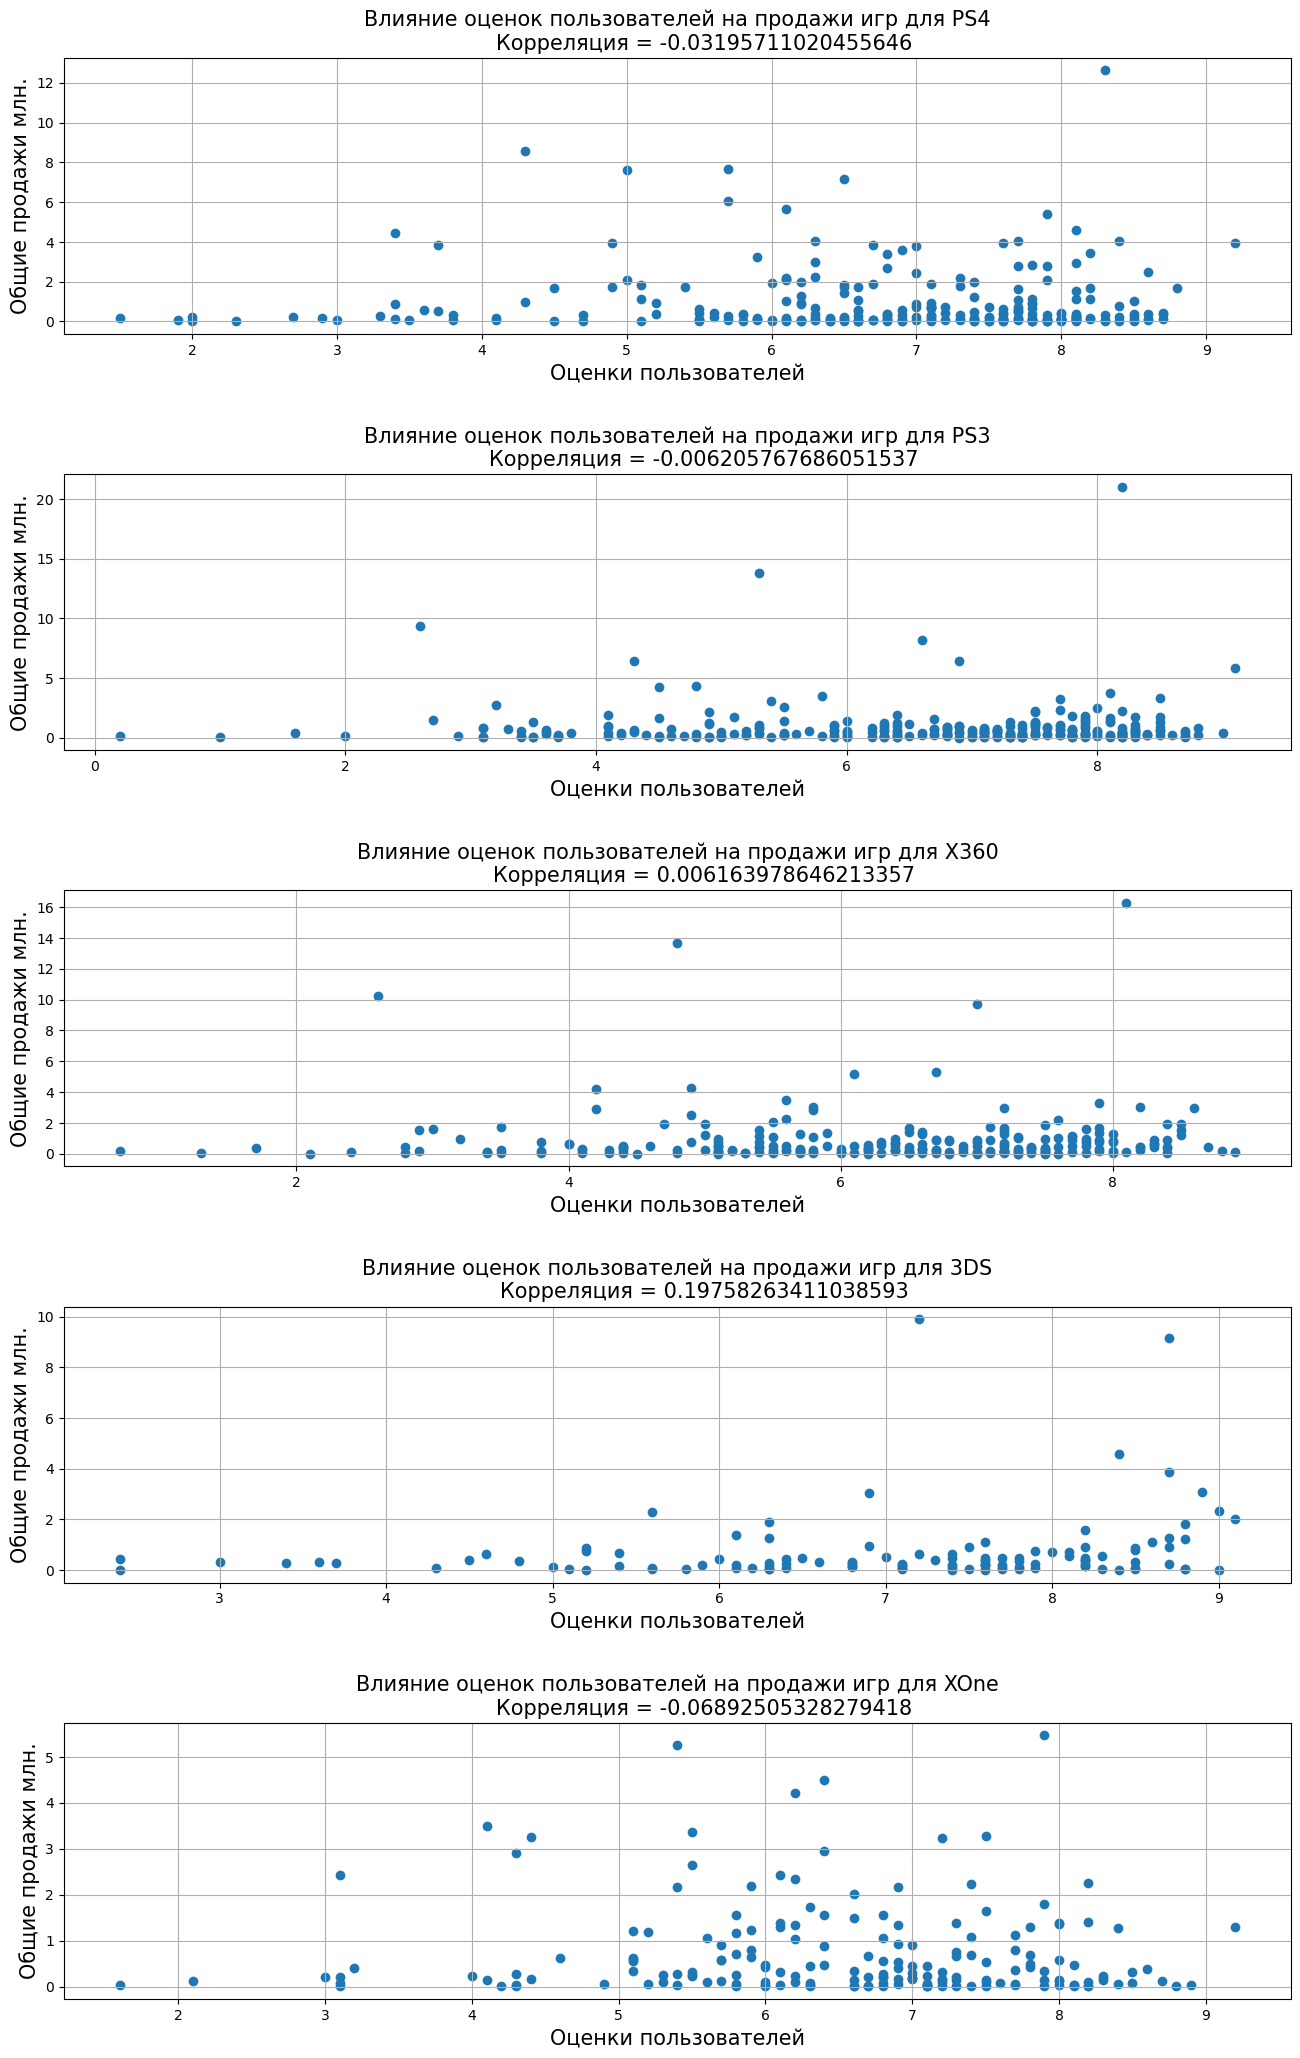

In [22]:
top_platforms = list(games_data.groupby('platform')[
    'all_sales'].sum().sort_values(ascending=False).index[:10])
top_platforms_5 = top_platforms[:5]

fig, ax = plt.subplots(5, figsize=(13, 20))
fig.tight_layout (h_pad=8)
n = 0

for i in top_platforms_5:
    for name in games_data['platform'].unique():
        if i == name:
            corr = games_data.query('platform == @name')['user_score'].corr(games_data.query('platform == @name')['all_sales'])
            ax[n].scatter(x = games_data.query('platform == @name')['user_score'], 
                          y = games_data.query('platform == @name')['all_sales'])
            ax[n].set_xlabel("Оценки пользователей", fontsize=15)
            ax[n].set_ylabel("Общие продажи млн.", fontsize=15)
            ax[n].set_title(f'''Влияние оценок пользователей на продажи игр для {name}
        Корреляция = {corr}''', fontsize=15)
            ax[n].grid (True)
            n += 1

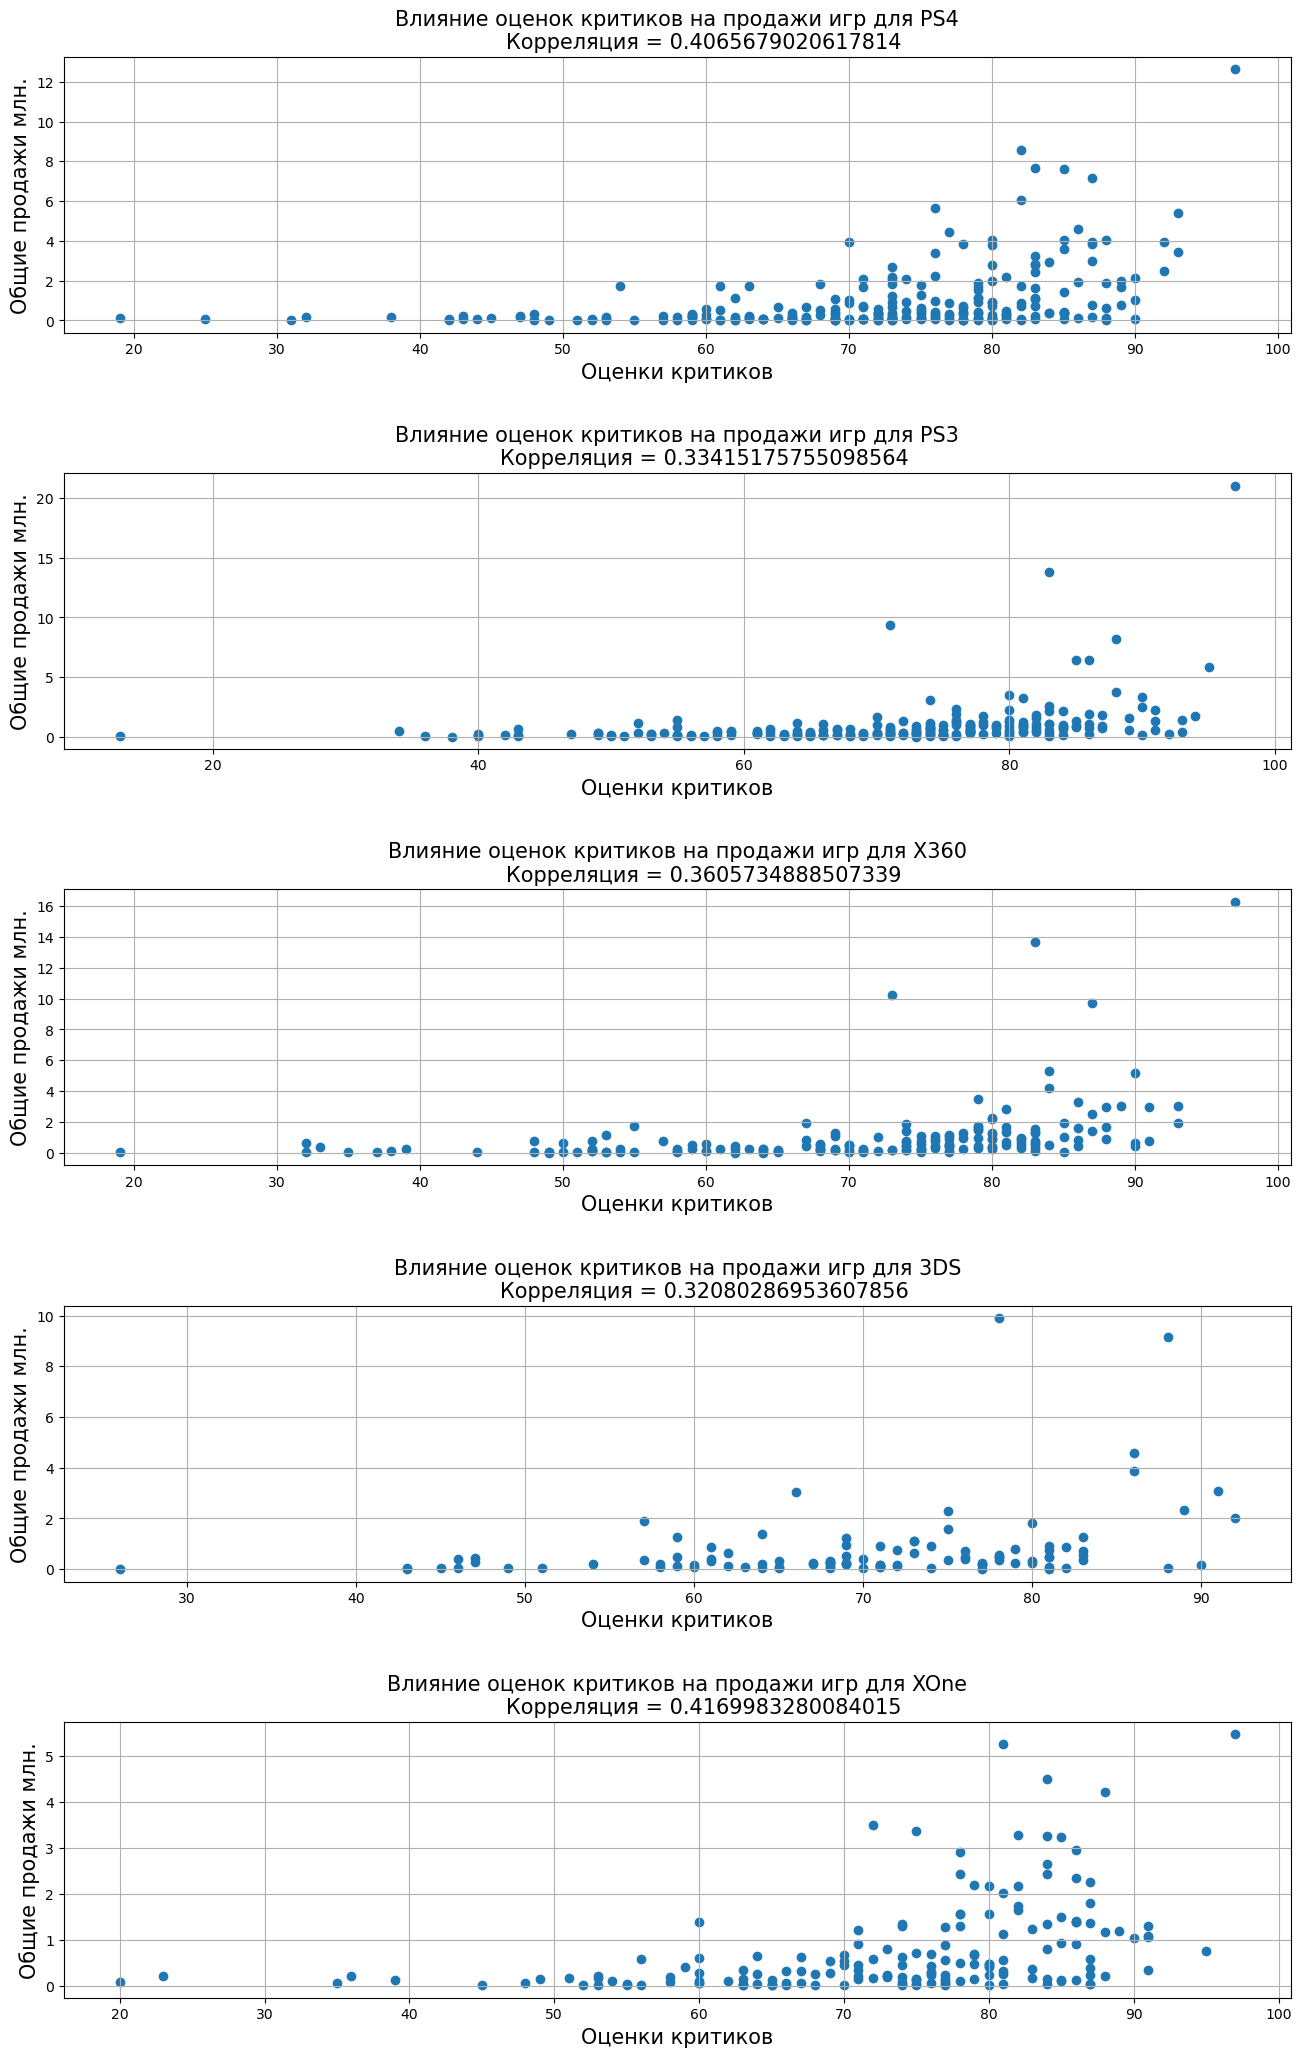

In [23]:
top_platforms = list(games_data.groupby('platform')[
    'all_sales'].sum().sort_values(ascending=False).index[:10])
top_platforms_5 = top_platforms[:5]

fig, ax = plt.subplots(5, figsize=(13, 20))
fig.tight_layout (h_pad=8)
n = 0

for i in top_platforms_5:
    for name in games_data['platform'].unique():
        if i == name:
            corr = games_data.query('platform == @name')['critic_score'].corr(
                games_data.query('platform == @name')['all_sales'])
            ax[n].scatter(x = games_data.query('platform == @name')['critic_score'], 
                          y = games_data.query('platform == @name')['all_sales'])
            ax[n].set_xlabel("Оценки критиков", fontsize=15)
            ax[n].set_ylabel("Общие продажи млн.", fontsize=15)
            ax[n].set_title(f'''Влияние оценок критиков на продажи игр для {name}
        Корреляция = {corr}''', fontsize=15)
            ax[n].grid (True)
            n += 1

Исходя из постоенных графиков и посчитанных коффициентов корреляции можно сказать, что отзывы и оценки пользователей не влияют на цисло продаж в отличие от оценок критиков. Это распросраняется на все платформы.

Осталось узнать общее распределение игр по жанрам. Для этого подойдет диаграмма размаха.

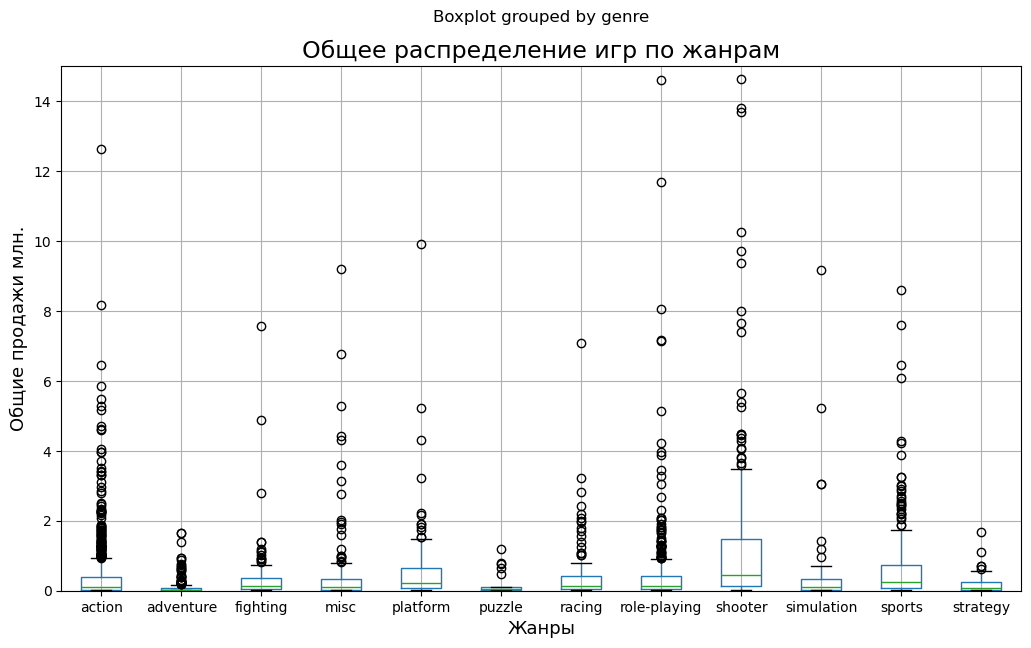

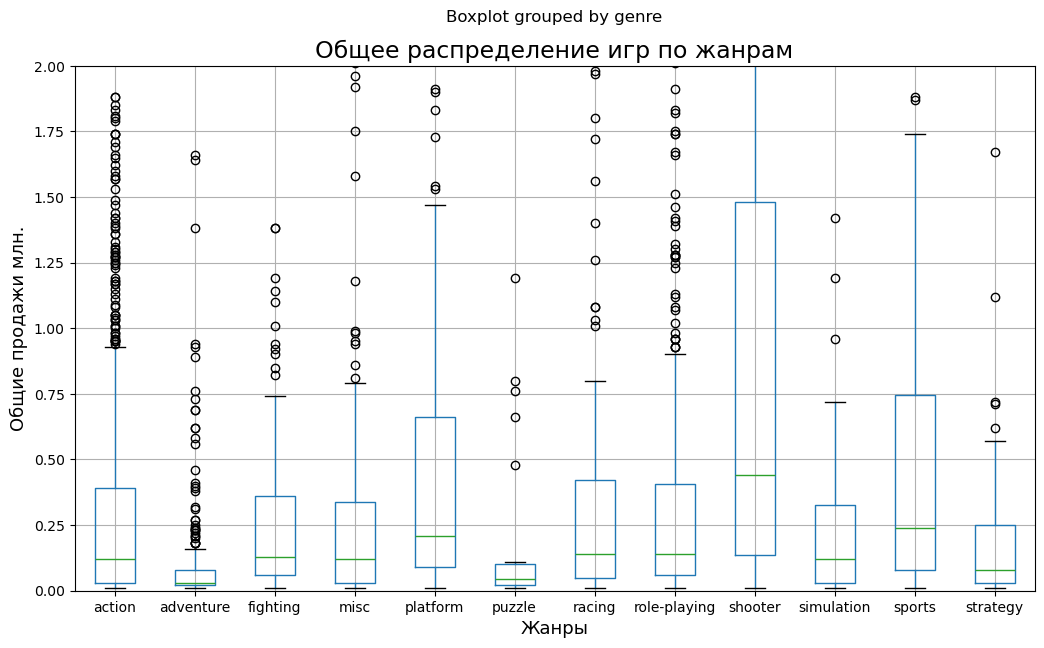

In [24]:
games_data.boxplot(column='all_sales', by='genre', figsize=(12,7))
plt.ylim([0, 15])
plt.ylabel('Общие продажи млн.', fontsize=13)
plt.xlabel('Жанры', fontsize=13)

plt.title('Общее распределение игр по жанрам', fontsize=17)
plt.show()

games_data.boxplot(column='all_sales', by='genre', figsize=(12,7))
plt.ylim([0, 2])
plt.ylabel('Общие продажи млн.', fontsize=13)
plt.xlabel('Жанры', fontsize=13)

plt.title('Общее распределение игр по жанрам', fontsize=17)
plt.show()

**Вывод**

С 1994 года наблюдался рост игровой индустрии, который продолжается до 2009. Именно с 1994 году появляются самые популярные игровые платформы ПК и консоли от Sony Play Station. Последние до сих пор остаются лидерами. На сегоднящний день положительную динамику по количеству выпущенных игр имеют Play Station 4, Xbox One и ПК. Проследив по графику за сколько лет платформы прохоят свой пик - 5 лет, мы выделили наиболее важные для нашего исследования данные - с 2012 по 2016 годы. 
Мы также рассмотрели распределение продаж для каждой платформы. Узнали влияние оценок пользователей и критиков на продажи. Число продаж не зависит от оценок пользователей, а отзывы критиков оказывают умеренное влияние на него. 
Из жанров самым успешным является "shooter", его медиана продаж равна примерно 400 тысячам, на втором месте "sports", его медиана - 250 тысяч, на третьем - "platform", медиана - 200 тысяч.

## Составляем портрет пользователя каждого региона

Для начала определим, какие платформы наиболее популярны в разных регионах. Узнаем топ 5 для каждого и построим круговые диаграммы. 

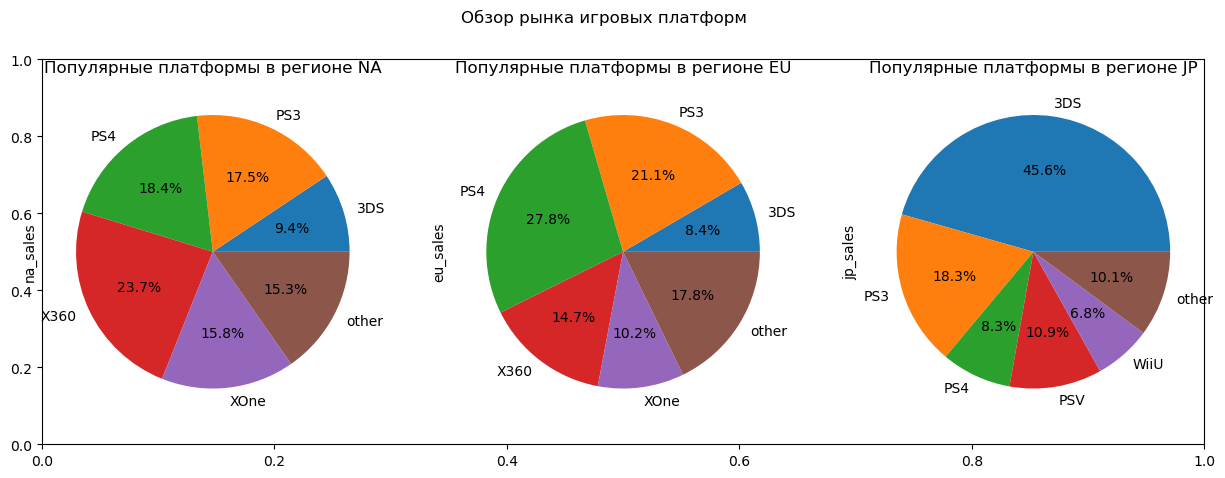

In [25]:
plt.subplots(figsize = (15,5))
regions = ['na', 'eu', 'jp']
plt.suptitle('Обзор рынка игровых платформ')
for i, region in enumerate(regions):
    column_name = '{}_sales'.format(region)
    current = games_data.groupby('platform').agg({column_name:'sum'}).reset_index()
    current['rank'] = current[column_name].rank(method = 'dense', ascending = False)
    current.loc[current['rank'] > 5, 'platform'] = 'other'
    current = current.groupby('platform').agg({column_name:'sum'})
    current.plot(y = column_name, kind = 'pie', autopct='%1.1f%%', ax = plt.subplot(1, len(regions), i + 1), legend=False)
    plt.title('Популярные платформы в регионе {}'.format(region.upper()))

Теперь мы видим, что PS4 наиболее популярен в Европе - 27.7%, а в США и Японии его продажи от общих составляют 18.3% и 8.3% соответственно. Продажи игр для PS3 во всех трех регионах не сильно отличаются, США - 17.5%, Европа - 21.1%, Япония - 18.3%. Самой популярной платформой в Японии является Nintendo 3DS - 45.5%. А вот в Америке и Европе продажи игр для нее составляют 9.4% и 8.4% соответственно. Игры для двух консолей от Xbox: Xbox 360 и Xbox One в Америке занимают 23.7% и 15.7%. В Европе они менее популярны - 14.7% и 10.1%. Но в Японии их вообще нет в топ 5. Их места занимают PSV и Wii U от Nintendo с долями 10.9% и 6.7% соответственно. Все не упомянутые платформы на диаграммах входят в категорию "other". Для США доля этой категории составляет 15.4%, для Европы - 18%, для Японии 10.2%.

In [ ]:
plt.subplots(figsize = (15,5))
regions = ['na', 'eu', 'jp']
plt.suptitle('Самые популярные игровые жанры')
for i, region in enumerate(regions):
    column_name = '{}_sales'.format(region)
    current = games_data.groupby('genre').agg({column_name:'sum'}).reset_index()
    current['rank'] = current[column_name].rank(method = 'dense', ascending = False)
    current.loc[current['rank'] > 5, 'genre'] = 'other'
    current = current.groupby('genre').agg({column_name:'sum'})
    current.plot(y = column_name, kind = 'pie', autopct='%1.1f%%', ax = plt.subplot(1, len(regions), i + 1), legend=False)
    plt.ylabel('')
    plt.title('Популярные жанры игр в регионе {}'.format(region.upper()))

Предпочтения американцев и европейцев в игровых жанрах схожи. Лидеруют игры жанра "Action", в США их доля составляет 30.4%, в Европе - 31.8%. На втором месте в этих регионах жанр "Shooter" - 24.4% в Америке и 22.3% в Европе. 13.7% в США и 13.6% в Европе рынка занимают игры жанра "Sports". На четвертом месте опять же у обоих регионов жанр "Role-playing" 10.8% и 9.5% в США и Европе соответственно. 

Но пятое место в этих регионах занимают разные игровые жанры. В Северной Америке это "Misc" - 6.4%. В Европе жанр "Rasing", доля которого составляет 5.4%. 

Япония сильно отличается от двух других регионов. Самая большая доля у игр жанра "Role-playing" - 33.9%. "Action" на втором месте - 27.4%. Игры жанра "Misc" имеют долю в Японии почти равную доле в США, но в Японии они на третьем месте - 6.8%. Доля жанра "Simulation" - 5.4%. И наконец "Fighting" - 4.9%.

Все жанры, которые не были указаны в диаграммах, составляют категорию "other". В Америке - 13.7%, в Европе - 13.6%, в Японии - 21.6%.

In [ ]:
plt.subplots(figsize = (15,5))
regions = ['na', 'eu', 'jp']
plt.suptitle('Самые популярные игровые жанры')
for i, region in enumerate(regions):
    column_name = '{}_sales'.format(region)
    current = games_data.groupby('rating').agg({column_name:'sum'}).reset_index()
    current['rank'] = current[column_name].rank(method = 'dense', ascending = False)
    current.loc[current['rank'] > 5, 'rating'] = 'other'
    current = current.groupby('rating').agg({column_name:'sum'})
    current.plot(y = column_name, kind = 'pie', autopct='%1.1f%%', 
                 ax = plt.subplot(1, len(regions), i + 1), legend=False, )
    plt.ylabel('')
    plt.title('Влияние рейтинга ESRB на продажи в {}'.format(region.upper()))

В Америке наиболее популярны игры с рейтингом «М» - 39%, на второй месте рейтинг «Е» - 19.3%. Игры с рейтингом «Е10+» составляют 13.1% от рынка, с рейтингом «Т» - 11.1%. 17.4% остались играм без указания возрастной категории.

В Европе соотношение примерно такое же отклонение максимум на 3 процента.

В Японии ситуация другая. Более половины рынка занимают игры без возрастного рейтинга - 56.6%. Игры с рейтингами «Е», «Т» и «М» примерно обладают примерно равными долями - 14.7%, 13.5%, 11% соответственно. Играм «Е10+» осталось всего 4.2%. 

Япония так отличается из-за того, что рейтинги ESRB пред созданы для США, Канады и Мексики. Чтобы запустить игру в Японии производителям не нужно получать такой рейтинг. 

**Вывод**

В этом разделе проекта мы выяснили, что нравится поклонникам видеоигр из трех регионов: Северной Америки, Европы и Японии. Регионы сравнивались по популярности у пользователей разных платформ, жанров и рейтингов. Мы выяснили, что США и Европа очень схожи по всем этим параметрам, Япония же почти их противоположность. 

## Проверяем гипотезы о равенстве средних

Xbox One и PC две из трех платформ, для которых продажи игр растут. Нам проверить гипотезу о равенстве их средних пользовательских рейтингов. 

Нулевая гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC равны.

Альтернативная гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC не равны.

In [ ]:
# создаем отдельные таблицы
xbox_one_user_score = games_data[games_data['platform'] == 'XOne']
pc_user_score = games_data[games_data['platform'] == 'PC']

alpha = 0.05 # устанавливаем уровень значимости
result_3 = st.ttest_ind(xbox_one_user_score['user_score'].dropna(), pc_user_score['user_score'].dropna())

print('p-значение:', result_3.pvalue)
if result_3.pvalue < alpha:
    print('Нулевая гипотеза отвергается')
else:
    print('Мы не можем отвергнуть нулевую гипотезу')
    
print('Средний пользовательский рейтинг Xbox One равен', xbox_one_user_score['user_score'].mean())
print('Средний пользовательский рейтинг PC равен равен', 
      pc_user_score['user_score'].mean())

Мы не можем отвергнуть гипотезу о равенстве средних пользовательских рейтингов этих двух платформ. Выведенными нами значения говорят то же самое.

Action и Sports два самых популярных жанра в США и Европе, первый популярен также и в Японии. Нам проверить гипотезу о равенстве их средних пользовательских рейтингов. 

Нулевая гипотеза: Средние пользовательские рейтинги жанров Action и Sports равны.

Альтернативная гипотеза: Средние пользовательские рейтинги жанров Action и Sports не равны.

In [ ]:
# создаем отдельные таблицы
action_user_score = games_data[games_data['genre'] == 'action']
sport_user_score = games_data[games_data['genre'] == 'sports']

alpha = 0.05 # устанавливаем уровень значимости
result_3 = st.ttest_ind(action_user_score['user_score'].dropna(), sport_user_score['user_score'].dropna())

print('p-значение:', result_3.pvalue)
if result_3.pvalue < alpha:
    print('Нулевая гипотеза отвергается')
else:
    print('Мы не можем отвергнуть нулевую гипотезу')
    
print('Средний пользовательский рейтинг жанра Action равен', action_user_score['user_score'].mean())
print('Средний пользовательский рейтинг жанра Sports равен', sport_user_score['user_score'].mean())

Гипотеза о равенстве средних пользовательских рейтингов двух жанров отвергается. 

Пояснения к работе с гипотезами:

Нулевая и альтернитивная гипотзы по значению не должны пересекаться. Нулевая всегда говорит о равенстве, поэтому именно так мы ее и сформулировали. Так как у нас не было четкой задачи выяснить, что средний пользовательский рейтинг, например, Action больше среднего пользовательского рейтинга Sports, то это не было отражено ни в альтернативных гипотезах, ни в аргументах применяемого критерия. 


Мы хотели проверить гипотезы о равенстве средних двух независимых генеральных совокупностей, их дисперсии равны, а Выборочные средние нормально распределены. Поэтому мы использовали Т-тест.

## Общий вывод

   Для проведения исследования мы получили датафрейм с информацией о продажах видеоигр с 1980 по 2016 годы в 3 регионах: Северная Америка, Европа и Япония. Чтобы начать анализ мы изменили тип данных в двух столбцах, убрали пропуски и добавили колонку с суммой продаж.  

   Быстрое развитие рынка видеоигр началось в 1994 с появлением популярных и сейчас платформ. Сейчас только три платформы растут в продажах: Play Station 4, Xbox One и ПК. Причем продажи игр для первых двух растут очень стремительно. Проанализировав данные, мы узнали, что платформа проходит свой пик примерно за 5 лет. Поэтому данные за последние 5 лет мы и будем использовать для решения задач проекта.

   Мы также рассмотрели распределение продаж для каждой платформы. Узнали влияние оценок пользователей и критиков на продажи. Отзывы пользователей никак не отражаются напродажах. Оценки критиков оказывают умеренное влияние. Также было определено общее распределение игр по жанрам. В тройку лидеров по продажам вошли "Shotter", "Sports" и "Platform". 

   Исследуя данные по регионам, мы выявили предпочтения их пользователей. 
        
   ***Северная Америка***
    
   Наиболее популярные платформы: Xbox 360 - 23.7%, Play Station 4 – 18.3%, Play Station 3 – 17.5%, Xbox One – 15.7%, Nintendo 3DS – 9.4%

   Самые популярные жанры игр: "Action" - 30.4%, "Shooter" - 24.4%, "Sports" – 13.7%, "Role-playing" 10.8%, "Misc" - 6.4%.

   Самые популярные рейтинги ESRB: «М», «Е», «Е10+», «Т».
   
   Таким образом для рекламных кампаний в США следует выбрать продукты для платформы Xbox 360 и/или Play Station 4, игры с жанром "Action" и возрастным рейтингом «М».

   ***Европа***
        
   Наиболее популярные платформы: Play Station 4 - 27.7%, Play Station 3 - 21.1%, Xbox 360 - 14.7%, Xbox One - 10.1%, Nintendo 3DS – 8.4%

   Самые популярные жанры игр: "Action" - 31.8%, "Shooter" – 22.3%, "Sports" – 13.6%, "Role-playing" 9.5%, "Rasing" - 5.4%.

   Самые популярные рейтинги: «М», «Е», «Е10+», «Т».
   
   Таким образом для рекламных кампаний в Европе следует выбрать игры для платформы Play Station 4, в жанре "Action" и возрастным рейтингом «М».

   ***Япония***

   Наиболее популярные платформы: Nintendo 3DS - 45.5%, Play Station 3 - 18.3%, PlayStation Vita – 10.9%,  Play Station 4 – 8.3%, Nintendo Wii U – 6.7%

   Самые популярные жанры игр: "Role-playing" - 33.9%, "Action" – 27.4%, "Misc" - 6.8%, "Simulation" - 5.4%, "Fighting" - 4.9%.

   В Японии более половины рынка занимают игры без рейтинга. Из ESRB «Е», «Т», «М» являются наиболее распространенными - 14.7%, 13.5%, 11%.
   
   Для рекламных кампаний в Японии следует выбрать продукты для Nintendo 3DS в жанрах "Role-playing" и/или "Action". Возрастной рейтинг в в этом регионе не важен.

   Также мы проверили гипотезы о равенстве средних пользовательских рейтингов платформ Xbox One и PC и жанров Action и Sports. 

   Вычисления показали, что средние пользовательские рейтинги платформ Xbox One и PC могут быть равны. Мы вывели сами средние показатели, и они действительно довольно близки. Примененный метод Т-теста показал, что гипотезу о равенстве средних пользовательских рейтингов и жанров Action и Sports  следует отвергнуть. Но как было указано выше, пользовательские рейтинги не влияют на число продаж видеоигр.




